In [1]:
"""
2. Implementing Feedforward neural networks with Keras and TensorFlow
a. Import the necessary packages
b. Load the training and testing data (MNIST/CIFAR10)
c. Define the network architecture using Keras
d. Train the model using SGD
e. Evaluate the network
f. Plot the training loss and accuracy
"""

'\n2. Implementing Feedforward neural networks with Keras and TensorFlow\na. Import the necessary packages\nb. Load the training and testing data (MNIST/CIFAR10)\nc. Define the network architecture using Keras\nd. Train the model using SGD\ne. Evaluate the network\nf. Plot the training loss and accuracy\n'

In [1]:
# Importing neccessay packages
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random



In [2]:
# Load the traning and test Data

mnist=tf.keras.datasets.mnist #importing mnist dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()  #Splitting it into training and testing dataset

In [3]:
x_train=x_train/255
x_test=x_test/255

In [4]:
# Define the Network Architecture using keras
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])


C:\Users\Komal Mahajan\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the model using sgd
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7254 - loss: 1.0396 - val_accuracy: 0.9058 - val_loss: 0.3551
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9015 - loss: 0.3539 - val_accuracy: 0.9183 - val_loss: 0.2920
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9184 - loss: 0.2922 - val_accuracy: 0.9296 - val_loss: 0.2563
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9276 - loss: 0.2622 - val_accuracy: 0.9352 - val_loss: 0.2330
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9345 - loss: 0.2373 - val_accuracy: 0.9368 - val_loss: 0.2165
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9404 - loss: 0.2128 - val_accuracy: 0.9441 - val_loss: 0.2001
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9434 - loss: 0.2005 - val_accuracy: 0.9471 - val_loss: 0.1871
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9461 - loss: 0.1917 - 

In [7]:
# Evaluate the network
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f"%test_loss)
print("Accuracy=%.3f"%test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9444 - loss: 0.1888
Loss=0.161
Accuracy=0.953


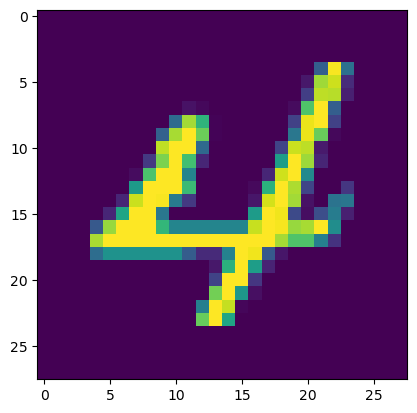

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


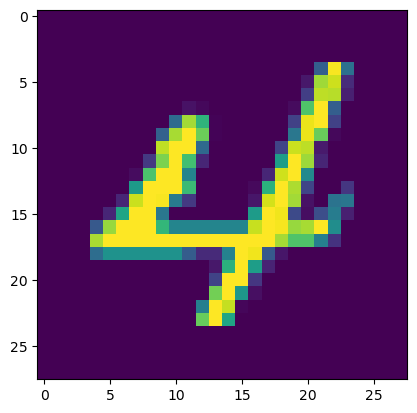

In [8]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()


In [9]:
print('Predicted Value: ',predicted_value[n])

Predicted Value:  [1.1351893e-04 1.1584988e-08 3.1761630e-04 4.8166606e-07 9.9883336e-01
 4.1683455e-05 3.1414357e-04 1.9903024e-04 1.8086964e-06 1.7824139e-04]


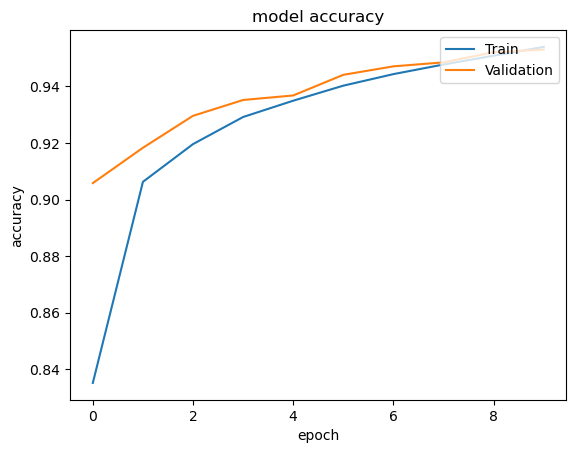

In [10]:
# Plot the training loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()


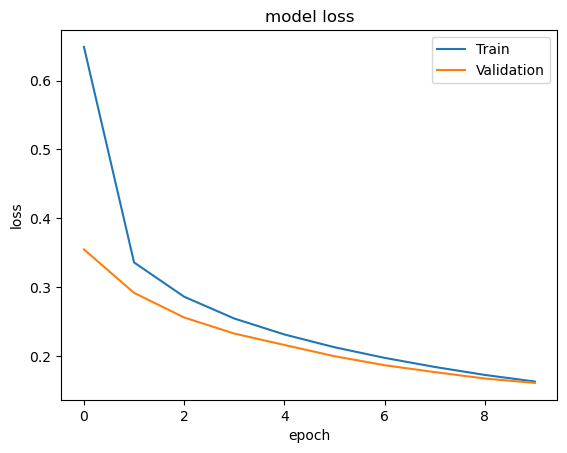

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()